In [150]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/jilanxin/Documents/Biobank/newmergeddata0604.csv')

to_drop = ['Unnamed: 0','n_21003_2_0','n_21003_1_0','n_25025_2_0','n_25733_2_0','n_25003_2_0','n_25007_2_0','n_31_0_0']
df_dropped = df.drop(to_drop, axis=1)
df_dropped = df_dropped.set_index('n_eid_14631')
df_dropped = df_dropped.dropna()
df_dropped.shape
add_GM = pd.read_csv('/Users/jilanxin/Documents/Biobank/add_GM.csv')
add_GM = add_GM.set_index('n_eid_14631')
add_GM = add_GM.drop('Unnamed: 0', axis=1)

add_DTI = pd.read_csv('/Users/jilanxin/Documents/Biobank/add_ISOVF.csv')
add_DTI = add_DTI.set_index('n_eid_14631')
add_DTI = add_DTI.drop('Unnamed: 0', axis=1)

ica = pd.read_csv('/Users/jilanxin/Documents/Biobank/icadata_age.csv')
ica = ica.drop(['Unnamed: 0','n_21003_0_0'], axis=1)
ica = ica.set_index('n_eid_14631')

In [151]:
GM_index = ['n_21003_0_0','n_25011_2_0', 'n_25012_2_0', 'n_25013_2_0',
       'n_25014_2_0', 'n_25015_2_0', 'n_25016_2_0', 'n_25017_2_0',
       'n_25018_2_0', 'n_25019_2_0', 'n_25020_2_0', 'n_25021_2_0',
       'n_25022_2_0', 'n_25023_2_0', 'n_25024_2_0','n_25782_2_0','n_25783_2_0', 'n_25784_2_0', 'n_25785_2_0',
       'n_25786_2_0', 'n_25787_2_0', 'n_25788_2_0', 'n_25789_2_0',
       'n_25790_2_0', 'n_25791_2_0', 'n_25792_2_0', 'n_25793_2_0',
       'n_25794_2_0', 'n_25795_2_0', 'n_25796_2_0', 'n_25797_2_0',
       'n_25798_2_0', 'n_25799_2_0', 'n_25800_2_0', 'n_25801_2_0',
       'n_25802_2_0', 'n_25803_2_0', 'n_25804_2_0', 'n_25805_2_0',
       'n_25806_2_0', 'n_25807_2_0', 'n_25808_2_0', 'n_25809_2_0',
       'n_25810_2_0', 'n_25811_2_0', 'n_25812_2_0', 'n_25813_2_0',
       'n_25814_2_0', 'n_25815_2_0', 'n_25816_2_0', 'n_25817_2_0',
       'n_25818_2_0', 'n_25819_2_0', 'n_25820_2_0', 'n_25821_2_0',
       'n_25822_2_0', 'n_25823_2_0', 'n_25824_2_0', 'n_25825_2_0',
       'n_25826_2_0', 'n_25827_2_0', 'n_25828_2_0', 'n_25829_2_0',
       'n_25830_2_0', 'n_25831_2_0', 'n_25832_2_0', 'n_25833_2_0',
       'n_25834_2_0', 'n_25835_2_0', 'n_25836_2_0', 'n_25837_2_0',
       'n_25838_2_0', 'n_25839_2_0', 'n_25840_2_0', 'n_25841_2_0',
       'n_25842_2_0', 'n_25843_2_0', 'n_25844_2_0', 'n_25845_2_0',
       'n_25846_2_0', 'n_25847_2_0', 'n_25848_2_0', 'n_25849_2_0',
       'n_25850_2_0', 'n_25851_2_0', 'n_25852_2_0', 'n_25853_2_0',
       'n_25854_2_0', 'n_25855_2_0', 'n_25856_2_0', 'n_25857_2_0',
       'n_25858_2_0', 'n_25859_2_0', 'n_25860_2_0', 'n_25861_2_0',
       'n_25862_2_0', 'n_25863_2_0', 'n_25864_2_0', 'n_25865_2_0',
       'n_25866_2_0', 'n_25867_2_0', 'n_25868_2_0', 'n_25869_2_0',
       'n_25870_2_0', 'n_25871_2_0', 'n_25872_2_0', 'n_25873_2_0',
       'n_25874_2_0', 'n_25875_2_0', 'n_25876_2_0', 'n_25877_2_0',
       'n_25878_2_0', 'n_25879_2_0', 'n_25880_2_0', 'n_25881_2_0',
       'n_25882_2_0', 'n_25883_2_0', 'n_25884_2_0', 'n_25885_2_0',
       'n_25886_2_0', 'n_25887_2_0', 'n_25888_2_0', 'n_25889_2_0',
       'n_25890_2_0', 'n_25891_2_0', 'n_25892_2_0', 'n_25893_2_0',
       'n_25894_2_0', 'n_25895_2_0', 'n_25896_2_0', 'n_25897_2_0',
       'n_25898_2_0', 'n_25899_2_0', 'n_25900_2_0', 'n_25901_2_0',
       'n_25902_2_0', 'n_25903_2_0', 'n_25904_2_0', 'n_25905_2_0',
       'n_25906_2_0', 'n_25907_2_0', 'n_25908_2_0', 'n_25909_2_0',
       'n_25910_2_0', 'n_25911_2_0', 'n_25912_2_0', 'n_25913_2_0',
       'n_25914_2_0', 'n_25915_2_0', 'n_25916_2_0', 'n_25917_2_0',
       'n_25918_2_0', 'n_25919_2_0', 'n_25920_2_0']

X_GM =  df_dropped[GM_index] #154
X_GM = pd.merge(X_GM, add_GM, how='inner', left_index=True, right_index=True)
X_GMnew = pd.DataFrame()
X_GMnew[['n_21003_0_0']] = X_GM[['n_21003_0_0']]
for i in GM_index[2:]:
    #print i
    X_GMnew[i] = X_GM[i].div(X_GM['n_25006_2_0'])
    #X_GMnew = X_GMnew.drop(['n_25005_2_0','n_25006_2_0'],axis=1)

In [152]:
df_dropped[X_GMnew.columns.values] = X_GMnew[X_GMnew.columns.values]
df_dropped['n_25006_2_0'] = X_GM['n_25006_2_0']
df_dropped['n_25005_2_0'] = X_GM['n_25005_2_0']
df_dropped.head()
print(df_dropped.shape)
print(X_GMnew.shape)

(11818, 235)
(11818, 153)


In [153]:
df_dropped = pd.merge(df_dropped, add_DTI, left_index=True, right_index=True)
df_dropped = pd.merge(df_dropped, ica, left_index=True, right_index=True)
df_dropped = df_dropped.dropna()

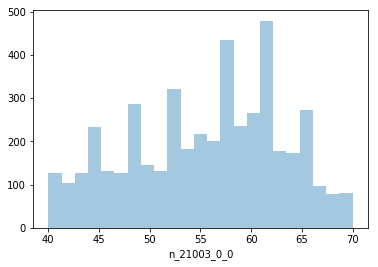

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.distplot(df_dropped['n_21003_0_0'], kde=False)

In [155]:
Gene_label = []
filename = "/Users/jilanxin/Documents/Biobank/apoe.txt"
with open(filename, "r") as myfile:
    for line in myfile:
        Gene_label.append(line.strip().split())
        
Gene_label_df = pd.DataFrame(Gene_label)

Gene_label_df.columns = Gene_label_df.iloc[0]
Gene_label_df.columns
APOE4e4 = Gene_label_df[Gene_label_df["apoe"].isin(['e4e4'])]
APOE2e2 = Gene_label_df[Gene_label_df["apoe"].isin(['e2e2'])]
APOE3e3 = Gene_label_df[Gene_label_df["apoe"].isin(['e3e3'])]

# Check correlations for IPAQ

In [160]:
old_data_mat = pd.read_csv('/Users/jilanxin/Documents/Biobank/final_cleandata3.csv')

In [161]:
ipaq = old_data_mat[['n_eid_14631','total_MET_min_per_wk_0_0','sex']]
ipaq = ipaq.set_index('n_eid_14631')

In [162]:
ipaq['sex'] = ipaq['sex']=='Male'

(nan, 1.0)


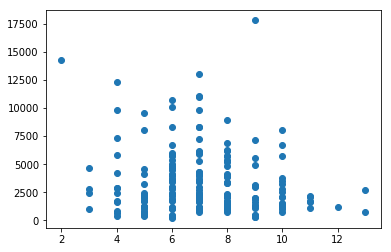

In [163]:
from scipy import stats
print(stats.pearsonr(old_data_mat['Fluid_intelligence_0'],old_data_mat['total_MET_min_per_wk_0_0']))
plt.scatter(old_data_mat['Fluid_intelligence_0'],old_data_mat['total_MET_min_per_wk_0_0'])
#plt.ylabel("ipaq", fontsize=16)
#plt.xlabel("age", fontsize=16)

In [97]:
stats.pearsonr?

In [164]:
df_dropped = pd.merge(df_dropped, ipaq, left_index=True, right_index=True)

In [165]:
df_dropped.dropna()
df_dropped.shape
df_dropped.columns

Index([u'n_25001_2_0', u'n_25002_2_0', u'n_25011_2_0', u'n_25012_2_0',
       u'n_25013_2_0', u'n_25014_2_0', u'n_25015_2_0', u'n_25016_2_0',
       u'n_25017_2_0', u'n_25018_2_0',
       ...
       u'V48', u'V49', u'V50', u'V51', u'V52', u'V53', u'V54', u'V55',
       u'total_MET_min_per_wk_0_0', u'sex'],
      dtype='object', length=340)

In [130]:
from statsmodels.formula.api import ols
fomula = 'Task_duration_2_mean' +'~age_0_0+total_MET_min_per_wk_0_0'
model = ols(fomula,old_data_mat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Task_duration_2_mean   R-squared:                       0.058
Model:                              OLS   Adj. R-squared:                  0.056
Method:                   Least Squares   F-statistic:                     30.25
Date:                  Thu, 17 Jan 2019   Prob (F-statistic):           1.79e-13
Time:                          11:31:05   Log-Likelihood:                -5964.4
No. Observations:                   978   AIC:                         1.193e+04
Df Residuals:                       975   BIC:                         1.195e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  392.7772     27.177     14.452      0.000     339.444     446.110
age_0_0                      3.7481      0.483      7.755      0.000       2.800       4.697
total_MET_min_per_wk_0_0    -0.0009      0.001     -0.767      0.443      -0.003       0.001
==============================================================================
Omnibus:                      472.507   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4702.981
Skew:                           1.969   Prob(JB):                         0.00
Kurtosis:                      12.995   Cond. No.                     3.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
df_dropped.shape

(1536, 340)

In [167]:
from statsmodels.formula.api import ols
GM_ols=[]
for cols in df_dropped.columns[2:-1]:
    fomula = cols +'~n_21003_0_0+sex+total_MET_min_per_wk_0_0'
    #print cols
    model = ols(fomula,df_dropped).fit()
    t_case, p_case = model.tvalues['total_MET_min_per_wk_0_0'], model.pvalues['total_MET_min_per_wk_0_0']
    GM_ols.append([cols,t_case, p_case])
    #print(cols,t_case,p_case)
    if p_case < 0.05:
        #print(cols,t_case,p_case,np.mean(X_GM_comp1[cols][X_GM_comp1["genome"]==True]),np.mean(X_GM_comp1[cols][X_GM_comp1["genome"]!=True]))
        print(cols,t_case,p_case, model.params['total_MET_min_per_wk_0_0'], model.params['n_21003_0_0'])

('n_25024_2_0', 2.0879273664598408, 0.037128673268757247, 4.1272456472251491e-09, -7.0418211790306659e-06)
('n_25516_2_0', 1.9911886407590342, 0.046809018618185406, 9.6968751893017992e-10, 4.5657238733145405e-07)
('n_25783_2_0', -2.1212140750255455, 0.03421902716424239, -7.4009535573566527e-08, -1.0804811101213558e-05)
('n_25812_2_0', -2.1851863564622591, 0.029172393607065878, -2.53931140480419e-08, 1.5643699344170121e-05)
('n_25826_2_0', -1.9704980440895392, 0.049135043996203137, -4.0283446510152559e-08, 6.1208940991514741e-06)
('n_25848_2_0', 2.5918698059487504, 0.0097243892487188718, 1.9333451942822272e-08, 2.580149946555827e-06)
('n_25849_2_0', 2.4552780978067976, 0.014295067712147565, 1.9148610480518297e-08, 3.4765137684330808e-06)
('n_25887_2_0', 2.0897481925615198, 0.036964223296378419, 1.5352387038342149e-08, 1.2868470058112432e-05)
('n_25888_2_0', 2.1357497193942776, 0.033011026173552074, 8.3382057899447257e-09, -4.9014623411788282e-06)
('n_25897_2_0', 2.2656578099907669, 0.02

## REMOVE APOE E4e4; don't run this when training

In [7]:
E3e3 = df_dropped[df_dropped.index.isin(APOE3e3['n_eid_14631'])]

In [8]:
E3e3.shape

(2731, 338)

In [9]:
y_df = E3e3['n_21003_0_0']
X_df = E3e3.drop(['n_21003_0_0'], axis=1)

X = X_df.as_matrix().astype(np.float)
y = y_df.as_matrix().astype(np.float)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [10]:
print("Averaged True Age:"+str(np.mean(y)))
print(X_df.shape)

Averaged True Age:55.7067008422
(2731, 337)


In [11]:
feature_names = X_df.columns.values
len(feature_names)

337

In [14]:
E4e4 = df_dropped[df_dropped.index.isin(APOE4e4['n_eid_14631'])]

y_e4 = E4e4['n_21003_0_0']
X_e4 = E4e4.drop(['n_21003_0_0'], axis=1)

X_e4 = X_e4.as_matrix().astype(np.float)
y_e4 = y_e4.as_matrix().astype(np.float)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_e4 = scaler.fit_transform(X_e4)

In [15]:
E2e2 = df_dropped[df_dropped.index.isin(APOE2e2['n_eid_14631'])]

y_e2 = E2e2['n_21003_0_0']
X_e2 = E2e2.drop(['n_21003_0_0'], axis=1)

X_e2 = X_e2.as_matrix().astype(np.float)
y_e2 = y_e2.as_matrix().astype(np.float)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_e2 = scaler.fit_transform(X_e2)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

model = Sequential()
model.add(Dense(256, input_dim=337, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss='mae', optimizer='adam', metrics=['mse','mae'])

# Fit the model
model.fit(X, y, epochs=100, batch_size=1024, validation_split=0.1)


Train on 2457 samples, validate on 274 samples
Epoch 1/100
2457/2457 [==============================] - 2s 712us/step - loss: 52.3566 - mean_squared_error: 2803.5614 - mean_absolute_error: 52.3566 - val_loss: 43.8402 - val_mean_squared_error: 1988.4719 - val_mean_absolute_error: 43.8402
Epoch 2/100
2457/2457 [==============================] - 0s 135us/step - loss: 36.7812 - mean_squared_error: 1452.3766 - mean_absolute_error: 36.7812 - val_loss: 21.0426 - val_mean_squared_error: 540.0635 - val_mean_absolute_error: 21.0426
Epoch 3/100
2457/2457 [==============================] - 0s 142us/step - loss: 15.0413 - mean_squared_error: 392.9651 - mean_absolute_error: 15.0413 - val_loss: 14.8941 - val_mean_squared_error: 356.5610 - val_mean_absolute_error: 14.8941
Epoch 4/100
2457/2457 [==============================] - 0s 139us/step - loss: 19.5027 - mean_squared_error: 700.7433 - mean_absolute_error: 19.5027 - val_loss: 9.1696 - val_mean_squared_error: 133.7253 - val_mean_absolute_error: 9.1

Epoch 36/100
2457/2457 [==============================] - 0s 147us/step - loss: 5.6590 - mean_squared_error: 51.7938 - mean_absolute_error: 5.6590 - val_loss: 8.6518 - val_mean_squared_error: 103.6192 - val_mean_absolute_error: 8.6518
Epoch 37/100
2457/2457 [==============================] - 0s 163us/step - loss: 5.6712 - mean_squared_error: 51.0011 - mean_absolute_error: 5.6712 - val_loss: 8.9310 - val_mean_squared_error: 109.8403 - val_mean_absolute_error: 8.9310
Epoch 38/100
2457/2457 [==============================] - 0s 199us/step - loss: 5.4674 - mean_squared_error: 48.2604 - mean_absolute_error: 5.4674 - val_loss: 8.7162 - val_mean_squared_error: 104.9306 - val_mean_absolute_error: 8.7162
Epoch 39/100
2457/2457 [==============================] - 0s 147us/step - loss: 5.4974 - mean_squared_error: 48.9069 - mean_absolute_error: 5.4974 - val_loss: 9.3659 - val_mean_squared_error: 118.4915 - val_mean_absolute_error: 9.3659
Epoch 40/100
2457/2457 [==============================] - 0s

Epoch 71/100
2457/2457 [==============================] - 0s 136us/step - loss: 4.4222 - mean_squared_error: 30.9791 - mean_absolute_error: 4.4222 - val_loss: 13.1716 - val_mean_squared_error: 207.2398 - val_mean_absolute_error: 13.1716
Epoch 72/100
2457/2457 [==============================] - 0s 136us/step - loss: 4.4638 - mean_squared_error: 32.2475 - mean_absolute_error: 4.4638 - val_loss: 13.0977 - val_mean_squared_error: 205.1386 - val_mean_absolute_error: 13.0977
Epoch 73/100
2457/2457 [==============================] - 0s 144us/step - loss: 4.3368 - mean_squared_error: 29.9631 - mean_absolute_error: 4.3368 - val_loss: 13.6727 - val_mean_squared_error: 221.2068 - val_mean_absolute_error: 13.6727
Epoch 74/100
2457/2457 [==============================] - 0s 142us/step - loss: 4.3367 - mean_squared_error: 29.9414 - mean_absolute_error: 4.3367 - val_loss: 12.5372 - val_mean_squared_error: 191.3979 - val_mean_absolute_error: 12.5372
Epoch 75/100
2457/2457 [============================

In [23]:
# print(model.history.keys())
# "Loss"
plt.plot(model.history['MAE'])
plt.plot(model.history['val_los'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

TypeError: 'History' object is not subscriptable

In [ ]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# calculate predictions
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)